# Vehicles Wrangle
This document is to be run 3rd (optionally after 03a-EDA, they are not dependent on each other)\
The purpose of this document is to justify wrangling steps, the actual wrangling functions are inside functions.R.

In [3]:
#Import Necessary libraries
library('tidyverse')
library('dplyr')
library('forcats')
source('functions.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
#Read Data
trainVehicles = read.csv('03a-vehicles-sample.csv')
holdoutVehicles = read.csv('03b-vehicles-holdout.csv')

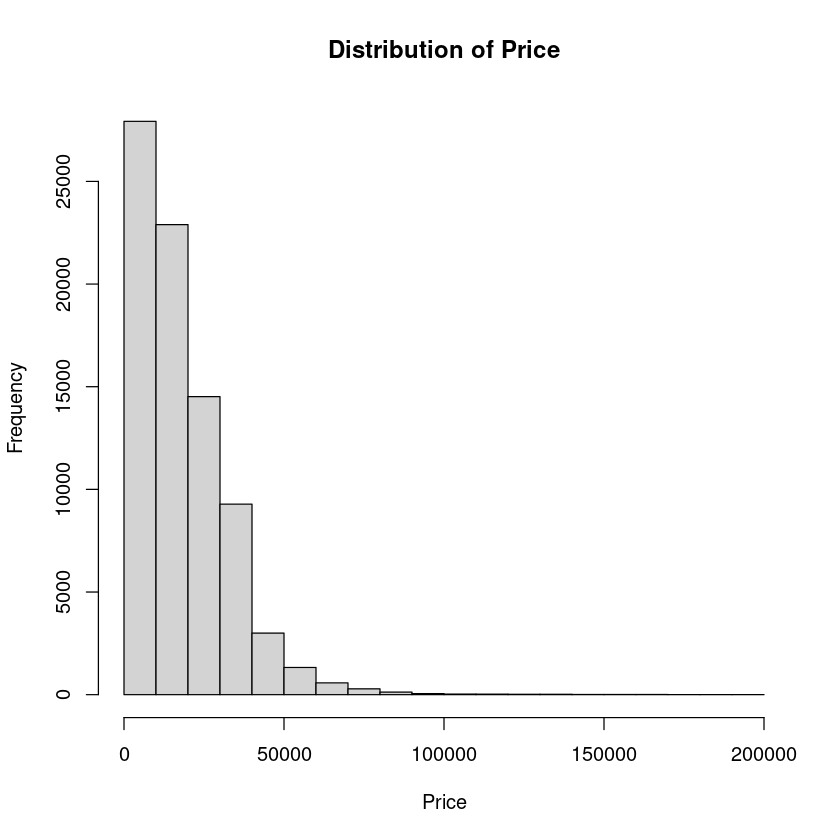

[1] -0.671225

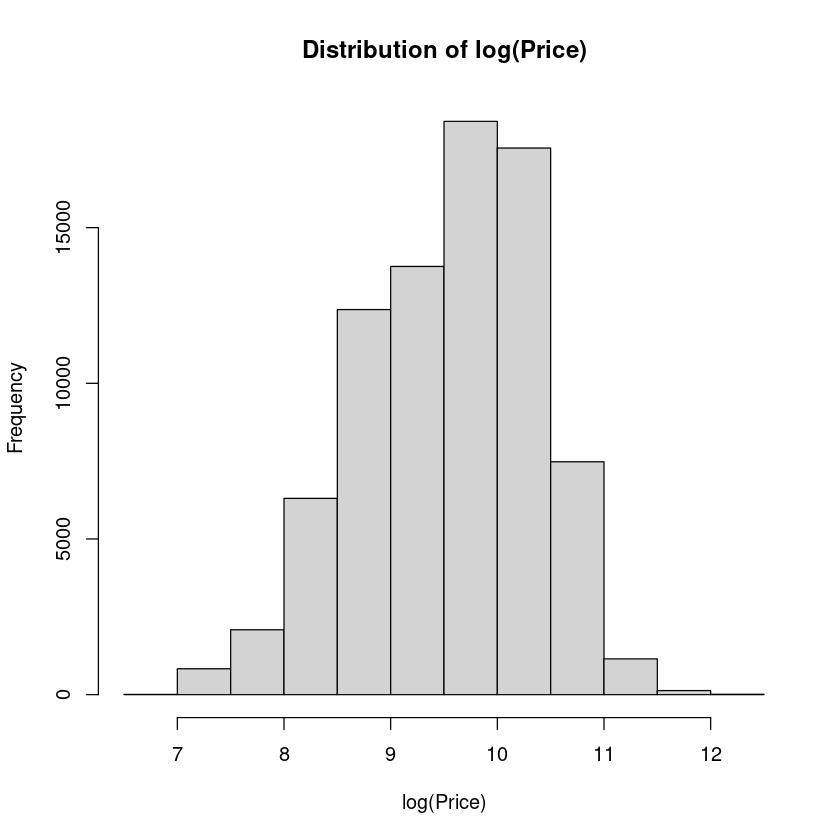

In [5]:
#Creating plots showing price
hist(trainVehicles$price, xlab = 'Price', main = 'Distribution of Price')
hist(log(trainVehicles$price), xlab ='log(Price)', main = 'Distribution of log(Price)')

#check numerical correlation
cor(trainVehicles$year,trainVehicles$odometer)

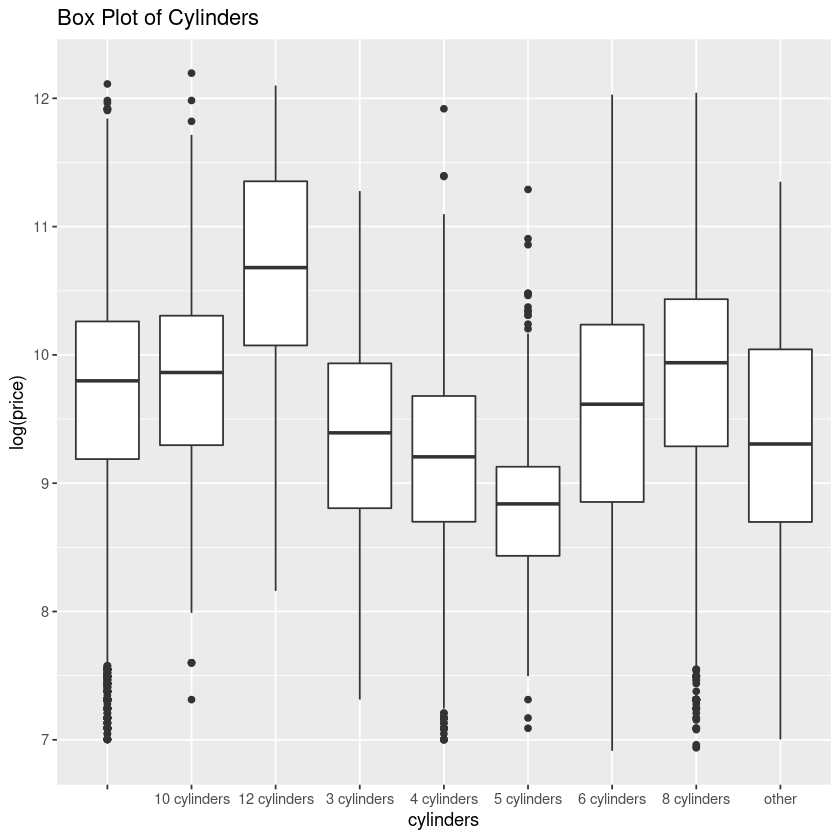

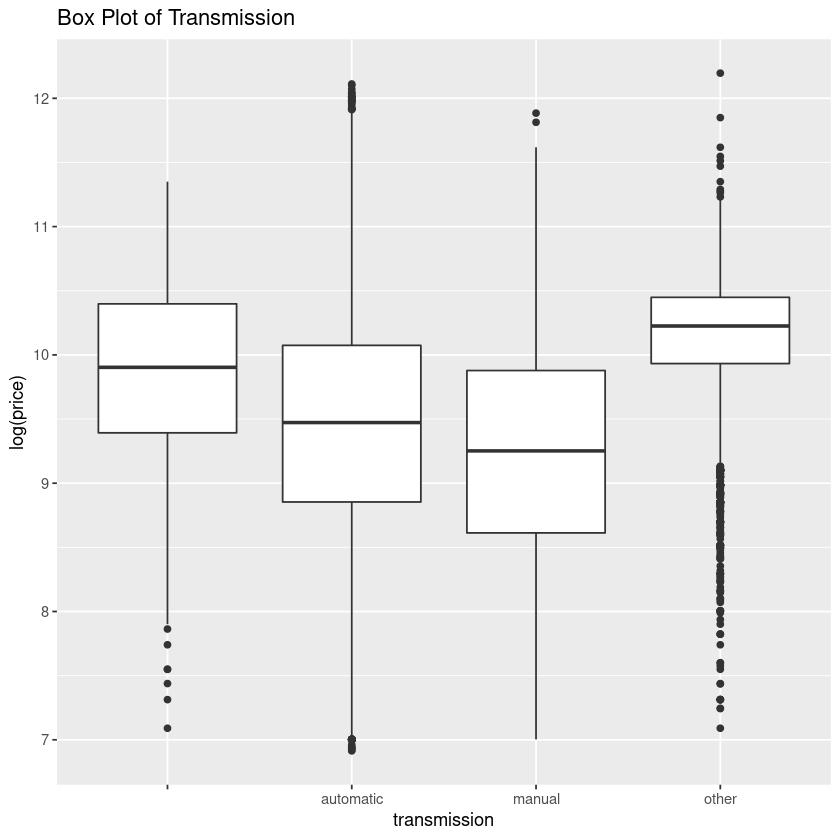

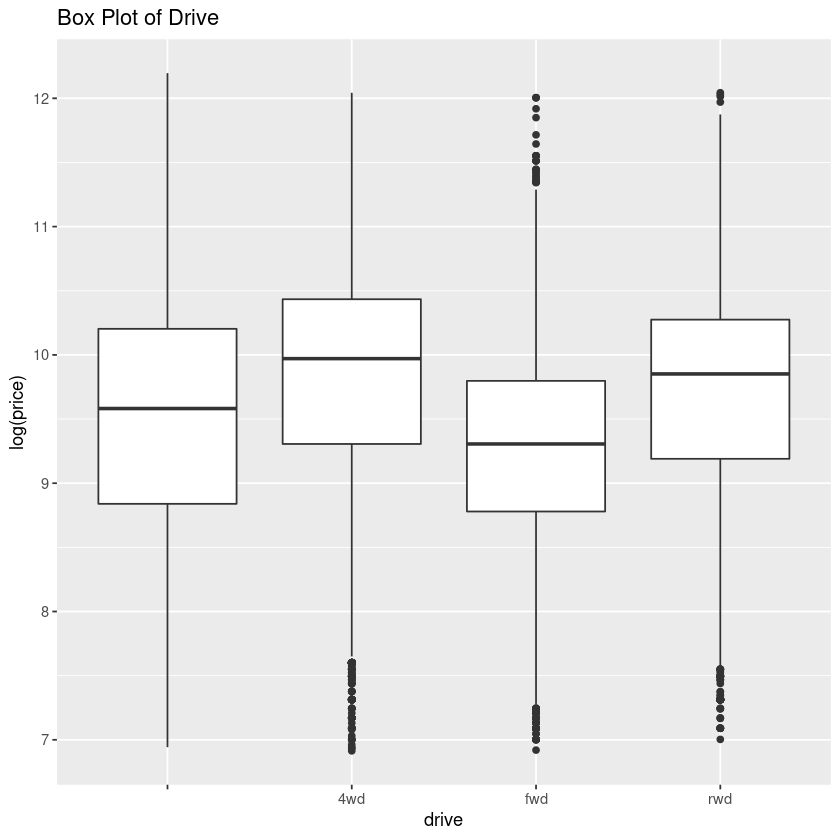

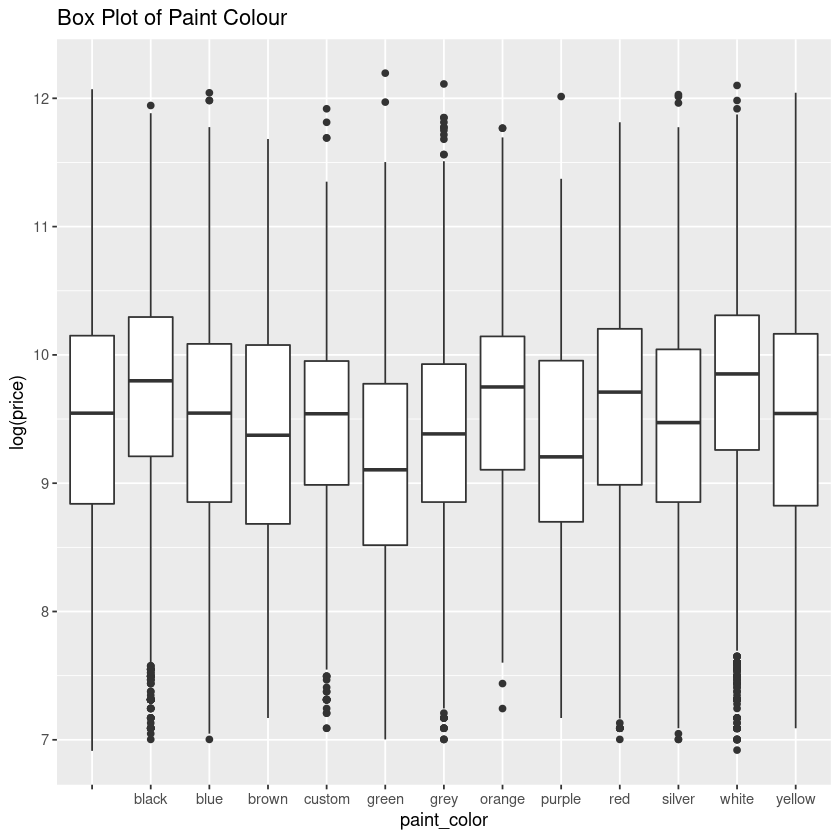

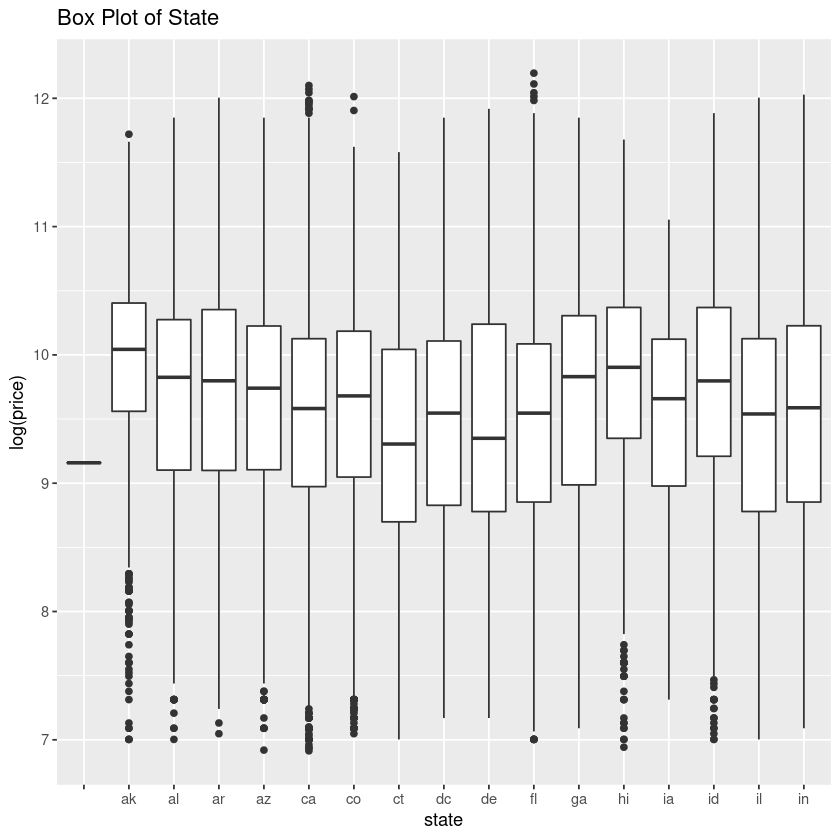

In [18]:
## Rough exploration, visuals not meant for presentation but possibly for report

# ggplot(aes(x = condition, y = log(price)), data = trainVehicles)+geom_boxplot() 
# ggplot(aes(x = manufacturer, y = log(price)), data = trainVehicles)+geom_boxplot() # too many manufacturers, crowded. pick sample?
# ggplot(aes(x = cylinders, y = log(price)), data = trainVehicles)+geom_boxplot() # technically this data is ordinal; transform and re-do?
# hist(trainVehicles$year,xlab = 'year', main = 'Frequency of Year') # already done above

# trainVehicles %>% group_by(manufacturer) %>% summarise(no_rows = length(manufacturer))
# manufacturerCount = trainVehicles %>% count(manufacturer) %>% filter(n > 1500)

## shows all manufacturers with NAs dropped, crowded and ugly
# manufacVehicles = !trainVehicles$manufacturer %in% manufacturerCount$manufacturer
# trainVehicles2 = trainVehicles
# trainVehicles2[manufacVehicles, ]$manufacturer <- NA 
# ggplot(aes(x = manufacturer, y = log(price)), data = trainVehicles2)+geom_boxplot() 

## Raw boxplots
ggplot(aes(x = cylinders, y = log(price)), data = trainVehicles)+geom_boxplot() +labs(title = "Box Plot of Cylinders")
# ggplot(aes(x = fuel, y = log(price)), data = trainVehicles)+geom_boxplot()
ggplot(aes(x = transmission, y = log(price)), data = trainVehicles)+geom_boxplot() +labs(title = "Box Plot of Transmission")
ggplot(aes(x = drive, y = log(price)), data = trainVehicles)+geom_boxplot() +labs(title = "Box Plot of Drive")
# ggplot(aes(x = type, y = log(price)), data = trainVehicles)+geom_boxplot()
ggplot(aes(x = paint_color, y = log(price)), data = trainVehicles)+geom_boxplot() +labs(title = "Box Plot of Paint Colour")
ggplot(aes(x = state, y = log(price)), data = trainVehicles)+geom_boxplot() +labs(title = "Box Plot of State")

# Condition
Dropped "like new" and "salvage" because they have very few entries; also "new" cars are not likely to be sold on craigslist
Consider combining "new" into "like new"? 
Should probably drop salvage completely

condition,no_rows
<chr>,<int>
,29881
excellent,20892
fair,1003
good,23306
like new,4668
new,252
salvage,94


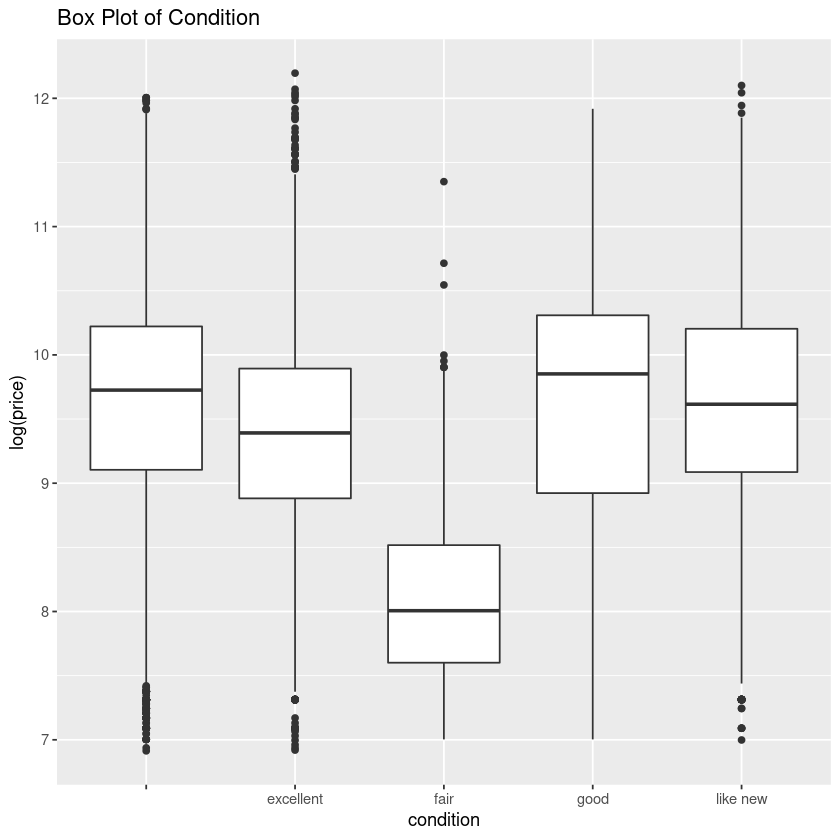

In [7]:
trainVehicles %>% group_by(condition) %>% summarise(no_rows = length(condition))

v3 = trainVehicles %>% filter(condition == "" | condition == "excellent" | condition == "fair"  | condition == "like new" | condition == "good")
ggplot(aes(x = condition, y = log(price)), data = v3)+geom_boxplot()+labs(title = "Box Plot of Condition")

# Vehicle Type and Size
## Size
"Size" is a created variable:
LARGE: 
bus
mini-van
offroad
pickup
SUV
truck
van
wagon

"MEDIUM":
convertible
hatchback
sedan 
coupe
## Type
Took out very small categories for visualization

Here we can see that offroad and bus are very small categories

type,no_rows
<chr>,<int>
,16366
bus,97
convertible,1502
coupe,3419
hatchback,3822
mini-van,1042
offroad,123
other,4055
pickup,7315


Size,no_rows
<fct>,<int>
medium,27226
large,32449
NA,20421


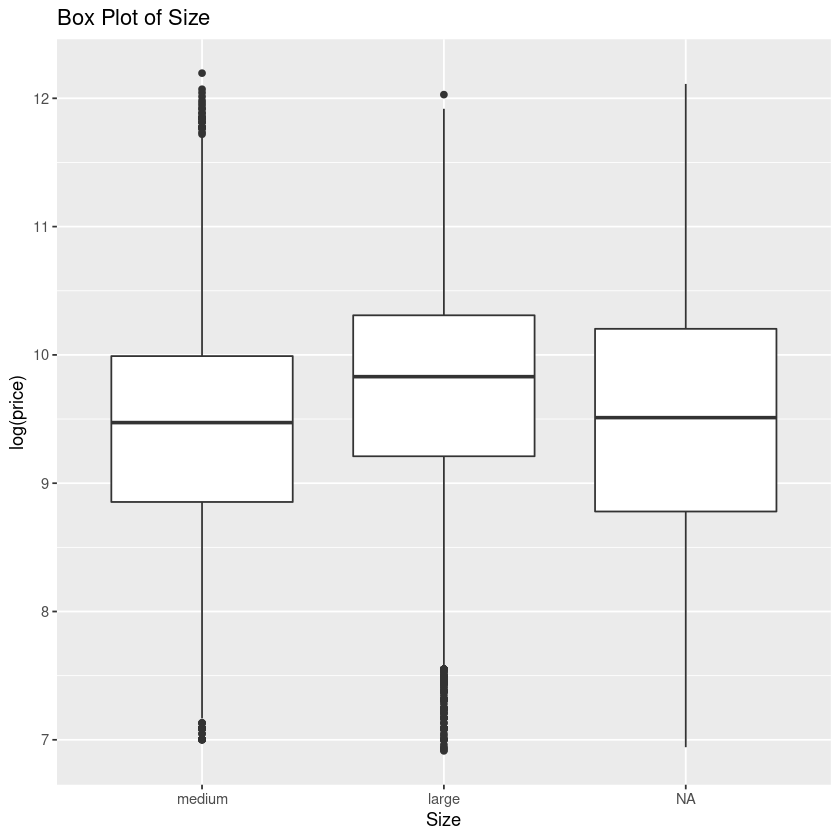

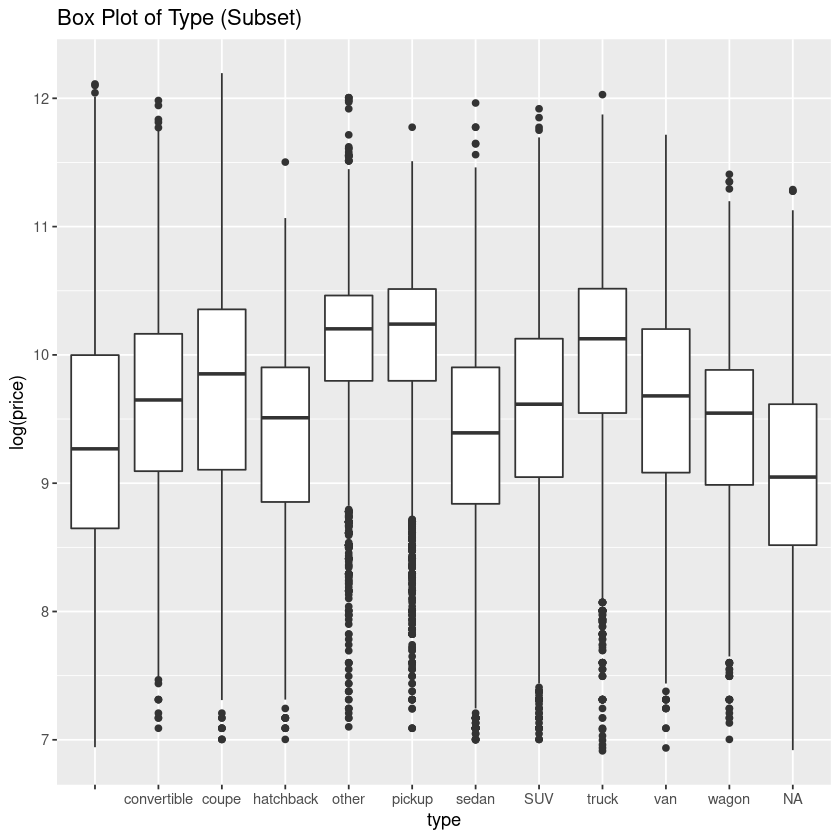

In [19]:
trainVehicles %>% group_by(type) %>% summarise(no_rows = length(type))

# going by https://uglab.stat.ubc.ca/~h.joe/stat447-2023/Notes/stat447-coding1.pdf
    # page 7
    # grouped vehicle types into categories
size=trainVehicles$type
size[size=="convertible"]="medium";size[size=="hatchback"]="medium";size[size=="sedan"]="medium";size[size=="coupe"]="medium"
size[size=="bus"]="large"; size[size=="mini-van"]="large"; size[size=="offroad"]="large"; size[size=="pickup"]="large"
size[size=="SUV"]="large"; size[size=="truck"]="large"; size[size=="van"]="large"; size[size=="wagon"]="large"
trainVehicles$Size=factor(size,levels=c("medium","large"))
ggplot(aes(x = Size, y = log(price)), data = trainVehicles)+geom_boxplot() +labs(title = "Box Plot of Size")
trainVehicles %>% group_by(Size) %>% summarise(no_rows = length(Size))

typeCount = trainVehicles %>% count(type) %>% filter(n > 1500)

typeVehicles = !trainVehicles$type %in% typeCount$type
trainVehicles3 = trainVehicles
trainVehicles3[typeVehicles, ]$type <- NA 
ggplot(aes(x = type, y = log(price)), data = trainVehicles3)+geom_boxplot() +labs(title = "Box Plot of Type (Subset)")

Here it appears it may be too general to bin by size, hence we can use the custom function 'type_bin' to roll bus and off-road types into other.

## Car Price and Age

In [9]:
trainVehicles$age = ageVehicle(trainVehicles)

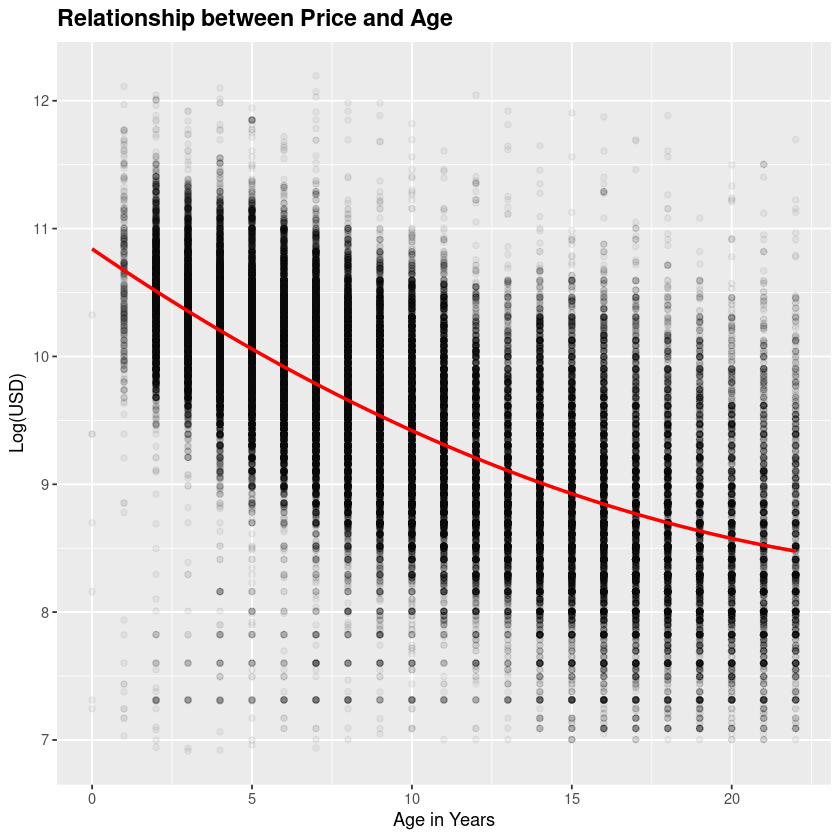

In [10]:
ggplot(data = trainVehicles, aes(x = age, y = log(price))) + geom_point(alpha = 0.05,col = 'black') + 
    geom_smooth(method = lm,formula = y ~ poly(x,2), col = 'red') + labs(x='Age in Years', y = 'Log(USD)') + ggtitle('Relationship between Price and Age') +
    theme(plot.title = element_text(color = "black", size = 14, face = "bold"))

Here we see there is a negative relationship between age and car price with less dispersion around newer cars compared to older cars. We can expect that this will have implications for the heterscedasticity of model errors.

## Car Miles and Age

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



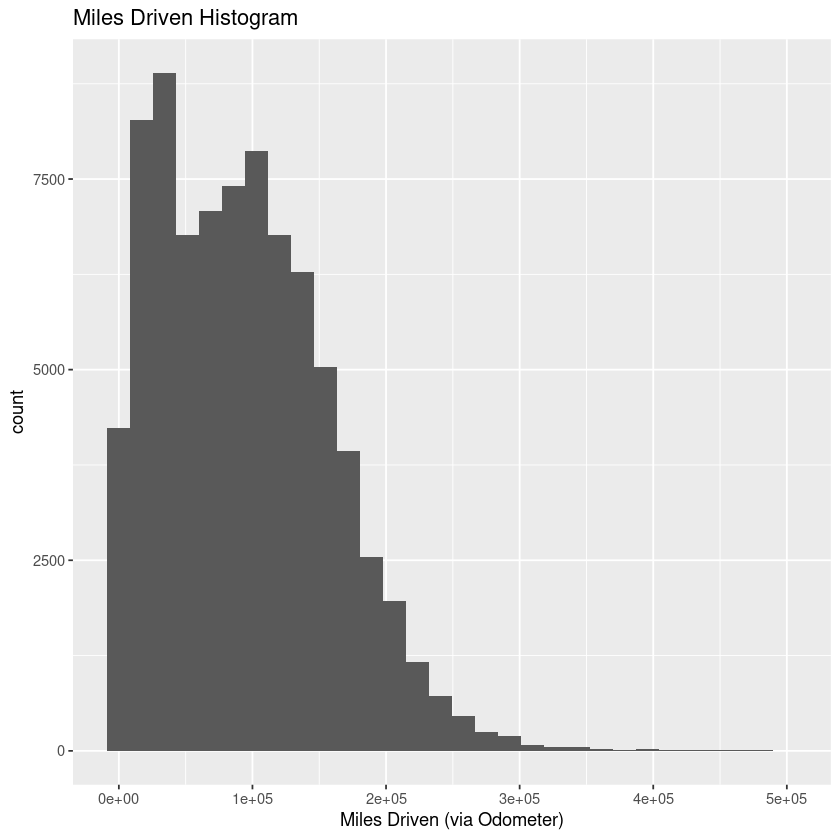

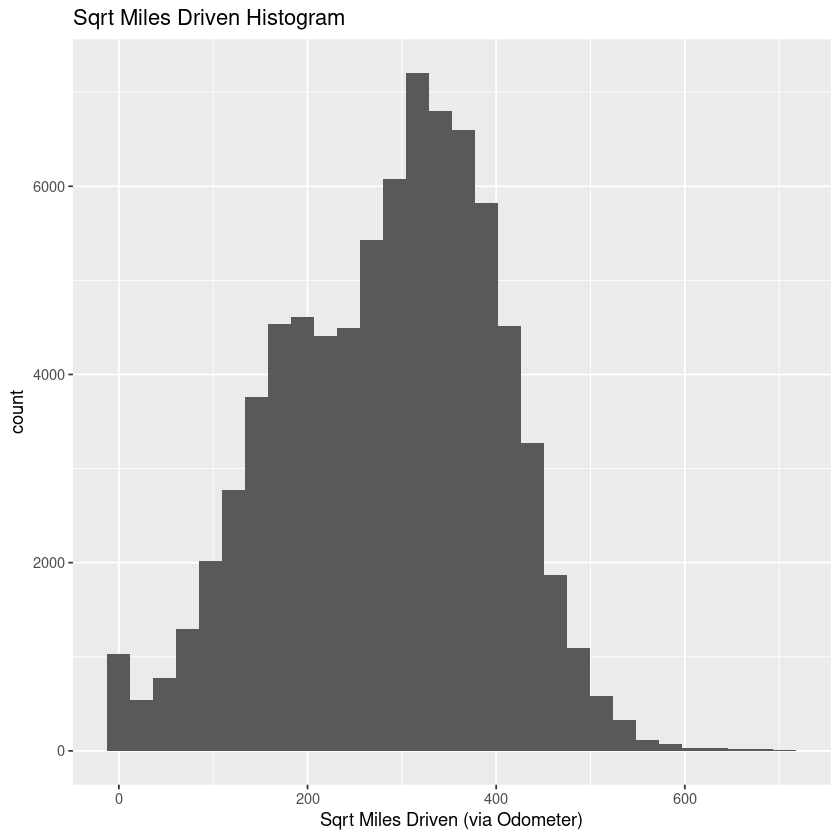

In [11]:
ggplot(data = trainVehicles,aes(x = odometer)) + geom_histogram() + labs(x = 'Miles Driven (via Odometer)', title = 'Miles Driven Histogram')
ggplot(data = trainVehicles,aes(x = sqrt(odometer))) + geom_histogram() + labs(x = 'Sqrt Miles Driven (via Odometer)', title = 'Sqrt Miles Driven Histogram')

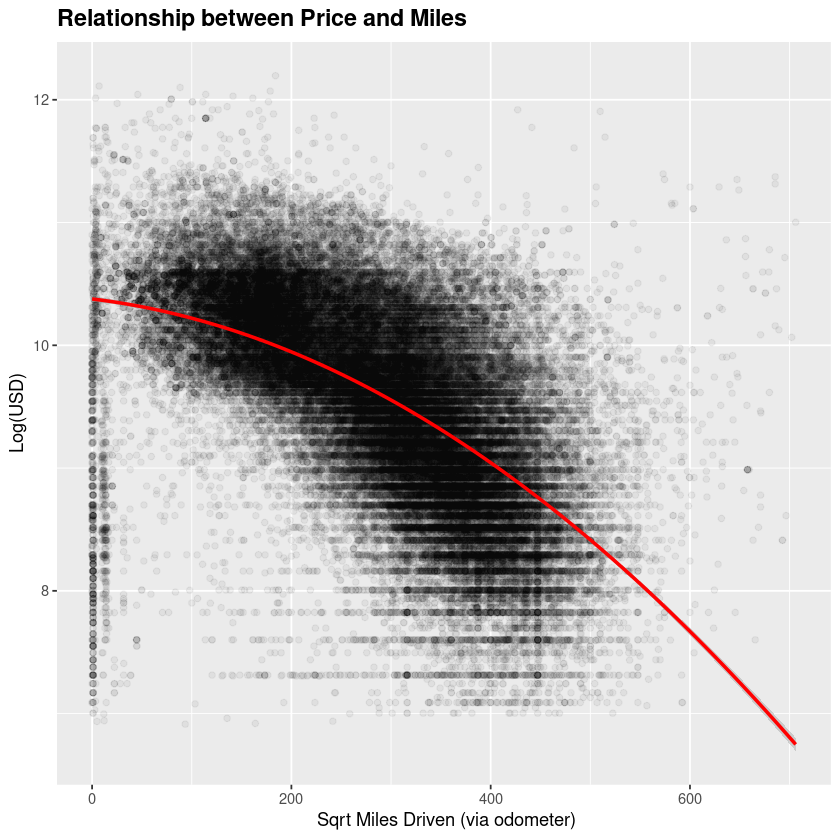

In [12]:
ggplot(data = trainVehicles, aes(x = sqrt(odometer), y = log(price))) + geom_point(alpha = 0.05,col = 'black') + 
    geom_smooth(method = lm,formula = y ~ poly(x,2), col = 'red') + labs(x=' Sqrt Miles Driven (via odometer)', y = 'Log(USD)') + ggtitle('Relationship between Price and Miles') +
    theme(plot.title = element_text(color = "black", size = 14, face = "bold"))

## Applying the wrangling function
see functions.R for documentation

In [13]:
#Reimport data to remove variables created above
trainVehicles = read.csv('03a-vehicles-sample.csv')
holdoutVehicles = read.csv('03b-vehicles-holdout.csv')

In [14]:
#apply wrangling function
wrangledTrainVehicles = wrangling_function(trainVehicles)
wrangledHoldoutVehicles = wrangling_function(holdoutVehicles)

In [15]:
head(wrangledTrainVehicles)

,price,condition,cylinders,fuel,title_status,transmission,drive,size,paint_color,state,type,countryOrigin,isLuxury,age,sqrt_odometer
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,33590,good,8 cylinders,gas,clean,other,,,white,al,pickup,USA,0,8,240.6720
2,22590,good,8 cylinders,gas,clean,other,,,blue,al,pickup,USA,0,12,266.8876
3,39590,good,8 cylinders,gas,clean,other,,,red,al,pickup,USA,0,2,138.4197
4,15000,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,black,al,truck,USA,0,9,357.7709
5,27990,good,8 cylinders,gas,clean,other,4wd,,black,al,pickup,USA,0,10,262.0992
6,34590,good,6 cylinders,gas,clean,other,4wd,,silver,al,pickup,USA,0,6,171.7527


In [16]:
saveRDS(wrangledTrainVehicles, '04a-wrangledTrain.rds')
saveRDS(wrangledHoldoutVehicles, '04b-wrangledHoldout.rds')